In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

In [32]:
df = pd.read_csv("olid-training-v1.0.tsv", sep="\t")
df.head(3)

,id,tweet,subtask_a,subtask_b,subtask_c
0,86426,@USER She should ask a few native Americans wh...,OFF,UNT,NaN
1,90194,@USER @USER Go home you’re drunk!!! @USER #MAG...,OFF,TIN,IND
2,16820,Amazon is investigating Chinese employees who ...,NOT,NaN,NaN


In [33]:
new_df = df[["tweet", "subtask_a"]]
new_df["subtask_a"] = new_df["subtask_a"].replace({"OFF": 1, "NOT": 0})
new_df.rename(columns={"subtask_a": "label", "tweet": "text"}, inplace=True)

/tmp/ipykernel_151084/2850866430.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["subtask_a"] = new_df["subtask_a"].replace({"OFF": 1, "NOT": 0})
/tmp/ipykernel_151084/2850866430.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.rename(columns={"subtask_a": "label", "tweet": "text"}, inplace=True)


In [34]:
train, test = train_test_split(new_df, test_size=0.13, random_state=42)

In [35]:
train, val = train_test_split(train, test_size=0.13, random_state=42)

In [36]:
train = train.reset_index(drop=True)
val = val.reset_index(drop=True)
test = test.reset_index(drop=True)

train.to_csv("train.csv", index=False)
val.to_csv("val.csv", index=False)
test.to_csv("test.csv", index=False)

In [37]:
texts_lengths = [len(x.split()) for x in df["tweet"].tolist()]

In [38]:
np.mean(texts_lengths), np.max(texts_lengths), np.min(texts_lengths)

(22.307703927492447, 103, 2)

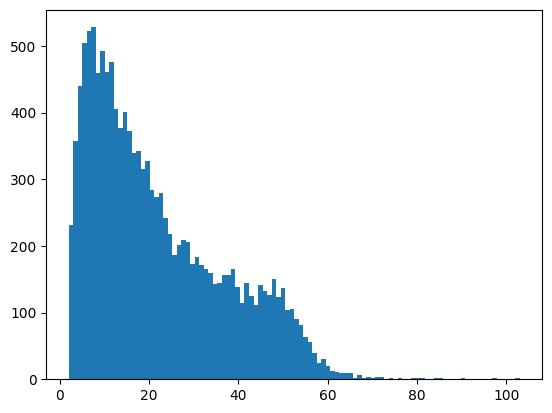

In [39]:
plt.hist(texts_lengths, bins=100)
plt.show()

In [40]:
train.shape, val.shape, test.shape

((10020, 2), (1498, 2), (1722, 2))